# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

Họ và Tên: Thái Thị Trà My  
MSSV: 2174802010891

In [170]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [171]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y

X, y = load_dataset()

print(X.shape, y.shape)

(100, 4) (100,)


Kết quả: (100, 4) (100,)

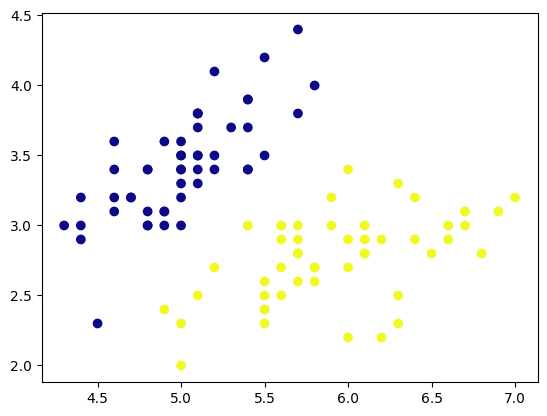

In [172]:
# Trực quan hóa dữ liệu
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma)

Kết quả

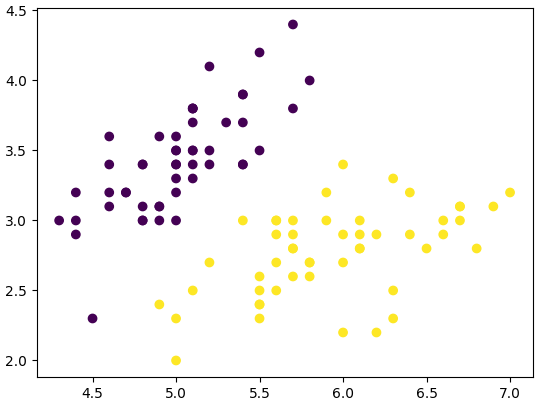

In [173]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        self.linear = nn.Linear(n_features, 1)                # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [174]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    
    def __len__(self):
        return  len(self.X)            #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)
    
    def __getitem__(self, idx):
        return  self.X[idx], self.y[idx]            #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [175]:
# Tạo dữ liệu
dataset =  IrisTorch(X, y)

In [176]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size = int(0.7 * len(dataset))                      #70%
test_size = len(dataset) - train_size                     #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [177]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

In [178]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features=n_features)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [179]:
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            
            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    accuracy = correct / total
    test_accuracies.append(accuracy)
    
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 1.3117, Test Loss: 0.9687, Test Accuracy: 0.0143
Epoch 2/200, Train Loss: 0.9678, Test Loss: 0.9593, Test Accuracy: 0.4714
Epoch 3/200, Train Loss: 0.9293, Test Loss: 0.8130, Test Accuracy: 0.5286
Epoch 4/200, Train Loss: 0.8152, Test Loss: 0.7325, Test Accuracy: 0.5286
Epoch 5/200, Train Loss: 0.7226, Test Loss: 0.5766, Test Accuracy: 0.6714
Epoch 6/200, Train Loss: 0.5741, Test Loss: 0.5537, Test Accuracy: 0.5286
Epoch 7/200, Train Loss: 0.5472, Test Loss: 0.4630, Test Accuracy: 1.0000
Epoch 8/200, Train Loss: 0.4604, Test Loss: 0.4393, Test Accuracy: 0.7571
Epoch 9/200, Train Loss: 0.4309, Test Loss: 0.4120, Test Accuracy: 0.9857
Epoch 10/200, Train Loss: 0.4084, Test Loss: 0.3430, Test Accuracy: 1.0000
Epoch 11/200, Train Loss: 0.3432, Test Loss: 0.3435, Test Accuracy: 1.0000
Epoch 12/200, Train Loss: 0.3337, Test Loss: 0.3321, Test Accuracy: 0.9714
Epoch 13/200, Train Loss: 0.3202, Test Loss: 0.3243, Test Accuracy: 0.9857
Epoch 14/200, Train Loss: 0.3139, 

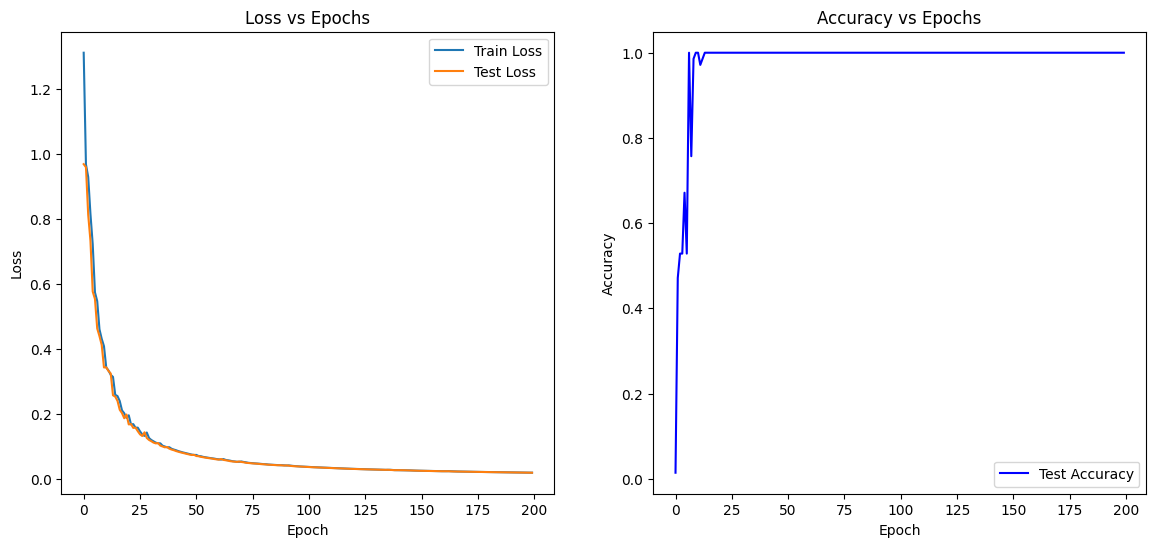

In [180]:
# Vẽ biểu đồ loss và accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(train_losses, label='Train Loss')
ax1.plot(test_losses, label='Test Loss')
ax1.set_title('Loss vs Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(test_accuracies, label='Test Accuracy', color='blue')
ax2.set_title('Accuracy vs Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Kết quả:

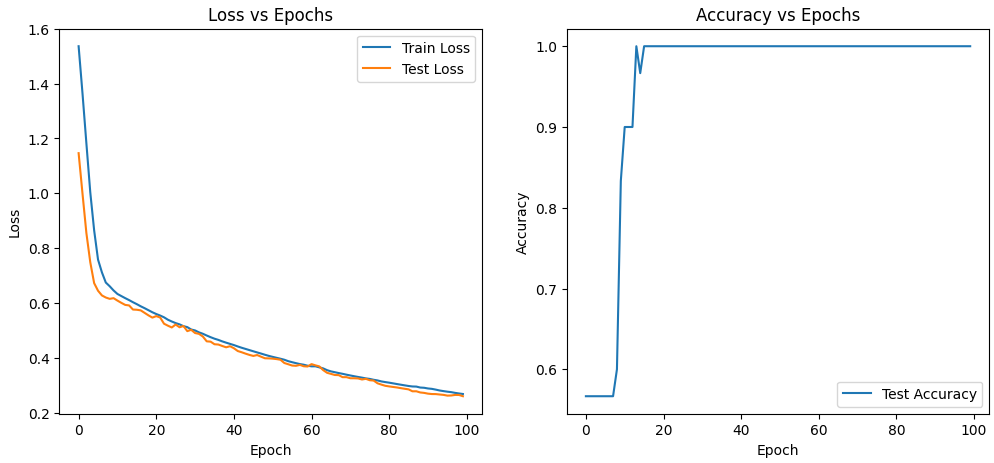